<a href="https://colab.research.google.com/github/saniamondal/Data-Analytics_Concrete-Data/blob/master/GC_Data_Analytics_Sania.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [180]:
#importing libraries

import numpy as np
import pandas as pd

#For visualization
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import StandardScaler


### Loading Dataset **'Concrete Compressive Strength'**

In [181]:
df=pd.read_excel('/Concrete_Data.xls')

df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


### Cleaning Dataset

In [182]:
#Checking Intial Shape
df.shape

(1030, 9)

In [183]:
#Dropping duplicate rows
df = df.drop_duplicates()

#Shape after removing duplicates
df.shape

(1005, 9)

In [184]:
#Checking on Missing Values
df.isnull().sum()

#Dropping null values
df = df.dropna()

#Shape after removing Nulls
df.shape

(1005, 9)

**Insights:**

1.   Duplicated Rows have been dropped.
2.   No missing data has been found.
3.   Data is cleaned.





### Data Splitting

In [185]:
#Features and Target
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

#Training Dataset
X_train,X_temp,y_train,y_temp=train_test_split(X,y,test_size=0.3,random_state=2)

#Validation and testing Dataset
X_val,X_test,y_val,y_test=train_test_split(X_temp,y_temp,test_size=0.5,random_state=2)

In [186]:
X_train.shape ,X_test.shape ,X_val.shape

((703, 8), (151, 8), (151, 8))

The data is randomly separated in three datasets for training, validation and testing. Splitting is done twice in this case.
Shapes of the training, validation and testing datasets have been shown.

### Data Visualization

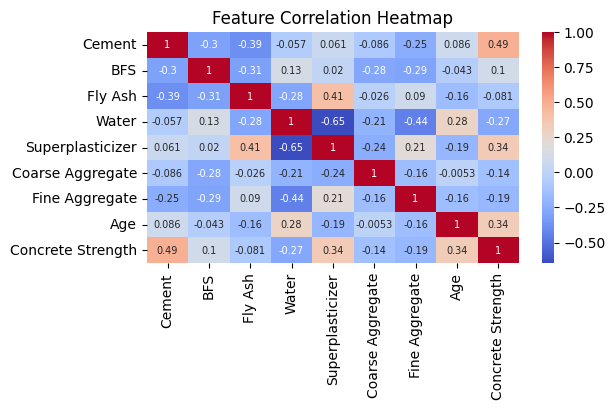

In [187]:
#Correlation heatmap
labels=['Cement','BFS','Fly Ash','Water','Superplasticizer','Coarse Aggregate','Fine Aggregate','Age','Concrete Strength']
plt.figure(figsize=(6,3))
sns.heatmap(df.corr(),annot=True, annot_kws={"size":7}, cmap="coolwarm",xticklabels=labels,yticklabels=labels)
plt.title("Feature Correlation Heatmap")
plt.show()

**Insights**

1.   Cement has a high proportional influence on the concrete strength.
2.   Superplasticizer improves strength without adding extra water.
3.   Water negatively affects the strength.





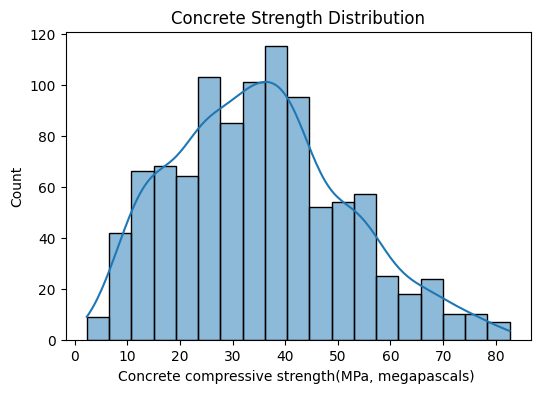

In [188]:
# Target distribution
plt.figure(figsize=(6,4))
sns.histplot(y, kde=True)
plt.title("Concrete Strength Distribution")
plt.show()

**Insight**
1. Strength distribution slightly right-skewed

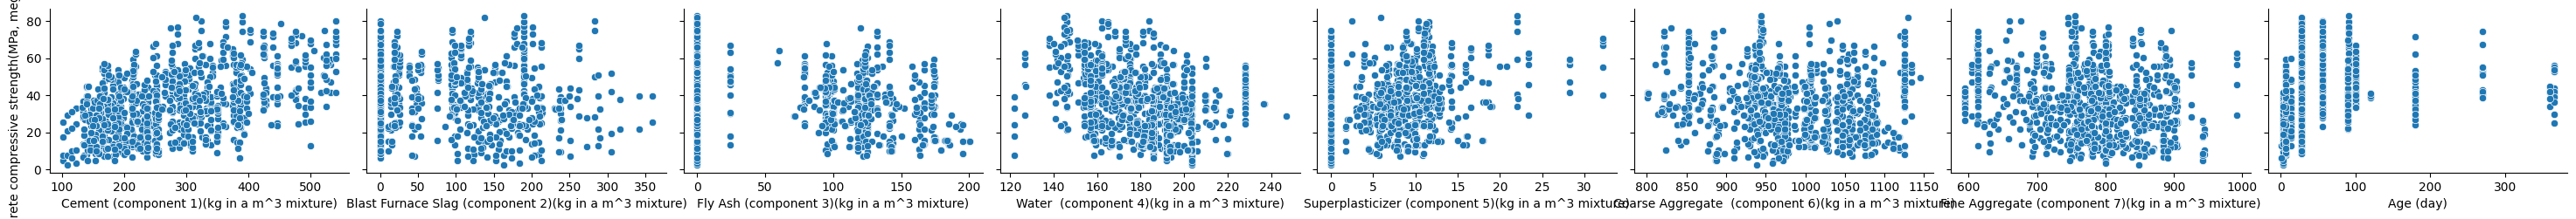

In [189]:
#Scatter Plot for every component against Concrete Strength
plot=sns.pairplot(df,y_vars=df.columns[-1],x_vars=df.columns[:-1],aspect=1.5)
plt.show()

**Insights**

1.   Cement vs Strength shows upward trend but clearly not linear.
2.   Water shows a negative influence.
3. In Age, strength gain slows over time.



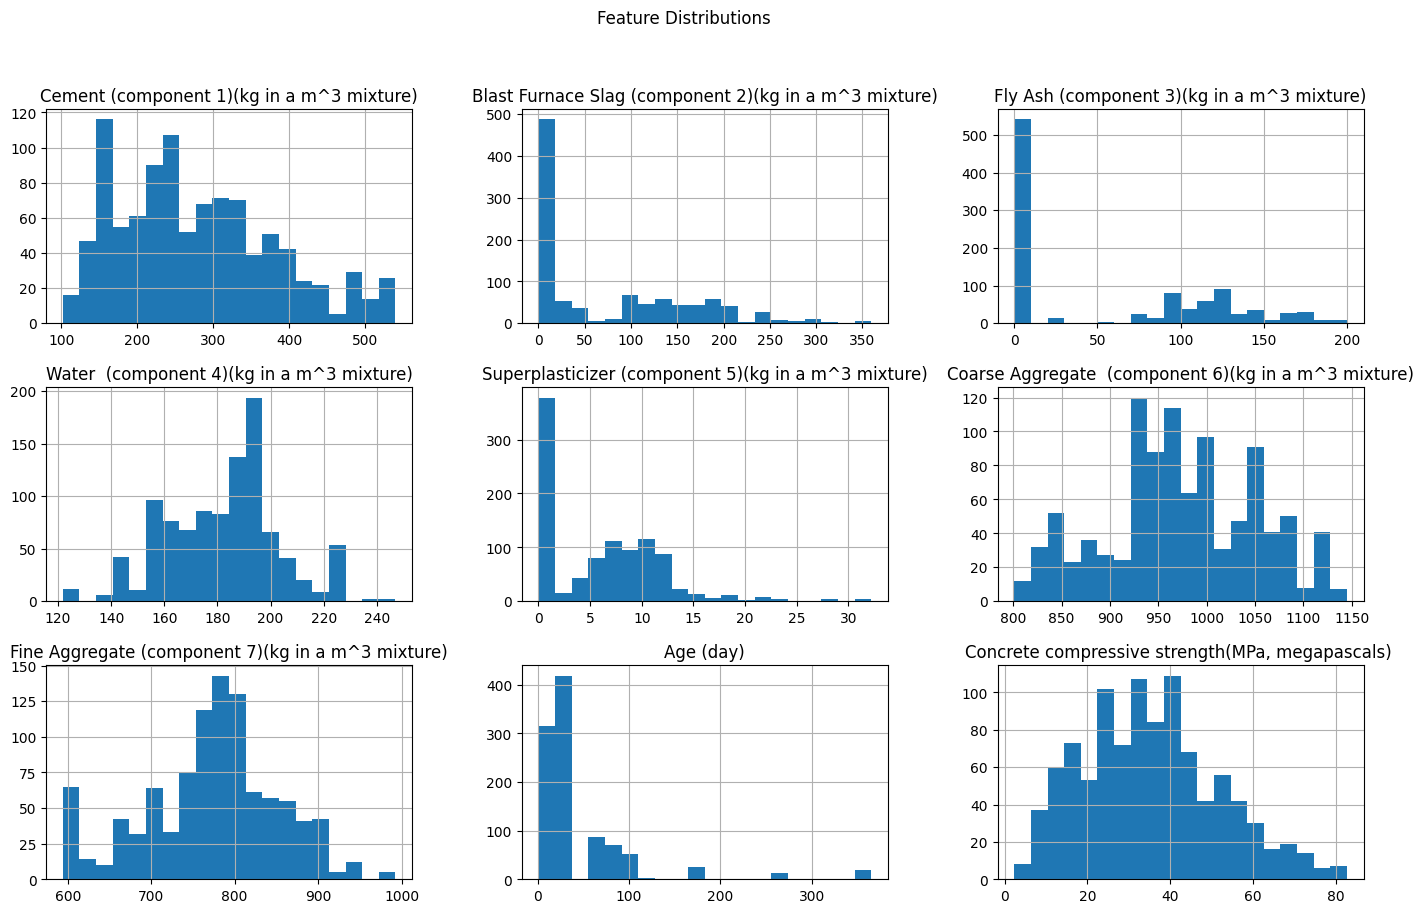

In [190]:
# Histograms for all features
df.hist(figsize=(17,10), bins=20)
plt.suptitle("Feature Distributions")
plt.show()


**Insights**

1.   Cement has a wider spread and is slightly right skewed.
2.   BFS, fly ash, superplatisizer, Age clearly has a higher     input in the right of the graphs.




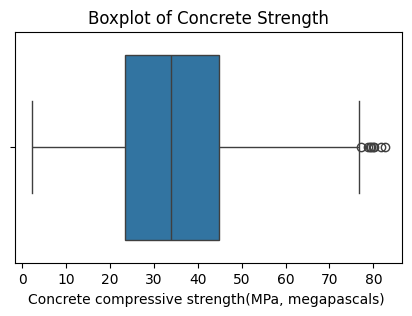

In [191]:
#Target Variable Behavior
plt.figure(figsize=(5,3))
sns.boxplot(x=y)
plt.title("Boxplot of Concrete Strength")
plt.show()

Insight

1. Few outliers after 75Mpa are visible.



In [192]:
(df['Concrete compressive strength(MPa, megapascals) ']>75).value_counts()

,count
"Concrete compressive strength(MPa, megapascals)",
False,994
True,11


Since there are very few strength values after 75, they can be considered as outliers.

### AdaBoost.R2 From Scratch

In [193]:
X.columns = X.columns.astype(str)

In [194]:
class AdaBoostR2Scratch:

    def __init__(self, n_estimators=50, random_state=42):
        self.n_estimators = n_estimators
        self.random_state = random_state
        self.models = []
        self.alphas = []
        np.random.seed(random_state)

    def fit(self, X, y):

        #Ensure stable dataframe
        X = pd.DataFrame(X).copy()
        X.columns = X.columns.astype(str)
        X = X.reset_index(drop=True)

        y = pd.Series(y).reset_index(drop=True)

        n = X.shape[0]
        weights = 1 / n

        for _ in range(self.n_estimators):

            #Train weak learner
            model = DecisionTreeRegressor(max_depth=1)

            model.fit(X, y, sample_weight=weights)
            y_pred = model.predict(X)

            #Compute normalized absolute error
            error = np.abs(y - y_pred)
            error_max = error.max()

            if error_max == 0:
                self.models.append(model)
                self.alphas.append(1)
                break

            error = error / error_max
            weighted_error = np.sum(weights * error)

            #Skip bad learner
            if weighted_error >= 0.5 or weighted_error == 0:
                continue
            alpha = np.log((1-weighted_error) / weighted_error)

            #Update weights
            weights = weights * np.exp(alpha * error)
            weights /= weights.sum()

            self.models.append(model)
            self.alphas.append(alpha)

        return self

    def predict(self, X):

        X = pd.DataFrame(X).copy()
        X.columns = X.columns.astype(str)

        model_preds = np.array([m.predict(X) for m in self.models])
        weights = np.array(self.alphas)

        return np.average(model_preds, axis=0, weights=weights)


### Finding Best Number of Weak Learners (M)

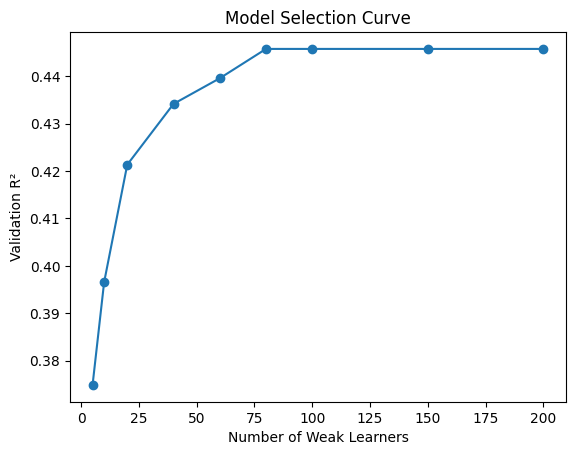

Best M: 150


In [195]:
M_values = [5,10,20,40,60,80,100,150,200]
val_scores = []

for M in M_values:
    model = AdaBoostR2Scratch(n_estimators=M)
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    val_scores.append(r2_score(y_val, preds))

plt.figure()
plt.plot(M_values, val_scores, marker="o")
plt.xlabel("Number of Weak Learners")
plt.ylabel("Validation R²")
plt.title("Model Selection Curve")
plt.show()

best_M = M_values[val_scores.index(max(val_scores))]
print("Best M:", best_M)


### Final Scratch Model Test Evaluation

Test R² (Scratch): 0.35202569264457273


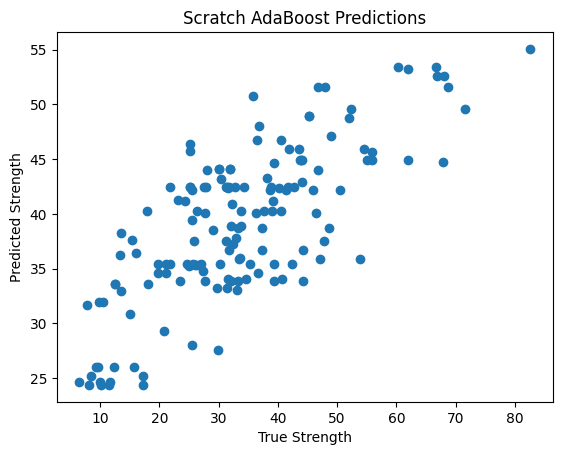

In [196]:
final_model = AdaBoostR2Scratch(n_estimators=best_M)
final_model.fit(X_train.copy(), y_train.copy())

test_preds = final_model.predict(X_test)

print("Test R² (Scratch):", r2_score(y_test, test_preds))

# Scatter plot
plt.figure()
plt.scatter(y_test, test_preds)
plt.xlabel("True Strength")
plt.ylabel("Predicted Strength")
plt.title("Scratch AdaBoost Predictions")
plt.show()


This evaluation of the scratch AdaBoost.R2 model on the test dataset indicates a strong performance and good generalization capability of the model.

Here, the scatter plot shows the values follow a close y=x line hence the predictions are closely aligned with actual values.

### Using Sklearn AdaBoostRegressor

In [197]:
sk_model = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=1), n_estimators=best_M, random_state=2)

sk_model.fit(X_train, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=1),
                  n_estimators=150, random_state=2)

### Testing Sklearn Model Evaluation

Test R² (sklearn): 0.34075894886809477


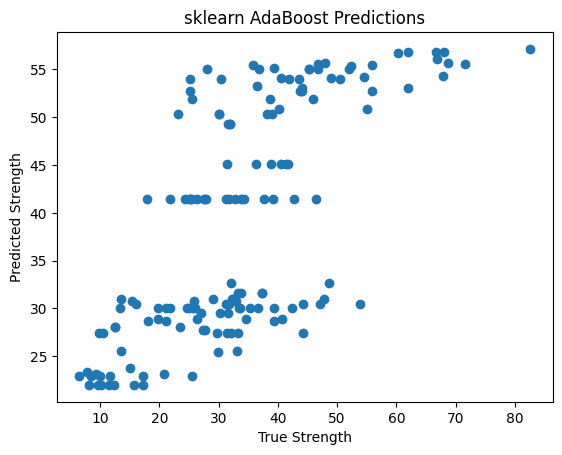

In [198]:
sk_pred = sk_model.predict(X_test)

print("Test R² (sklearn):", r2_score(y_test, sk_pred))

#Scatter Plot
plt.figure()
plt.scatter(y_test, sk_pred)
plt.xlabel("True Strength")
plt.ylabel("Predicted Strength")
plt.title("sklearn AdaBoost Predictions")
plt.show()


### Comparison between the scratch-implementation to that of sklearn


1.   The scratch model produces smoother predictions, while sklearn's model shows discrete prediction levels due to how boosting aggregates decision stumps.
2.   The scratch implementation demonstrates more continuous approximation, whereas sklearn shows piecewise behavior typical of boosted trees.
3. The scratch model extrapolates high-strength values more smoothly, while sklearn tends to saturate predictions at upper ranges.
4. The sklearn implementation is more stable but less flexible, while the scratch model adapts more closely to individual samples.

Thanks.
